In [1]:
import pandas as pd
from tqdm import tqdm

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms


# 코드 다시 돌리기 위한 seed 고정
import random
import numpy as np
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

### BaseLine

In [6]:
class MyModel(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(MyModel, self).__init__()
        """Base Model"""
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 100)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [7]:
model = MyModel(3, 100).to(device)
model

MyModel(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=100, bias=True)
)

In [8]:
train_transform = transforms.Compose([    
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))
])        

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))
])    

train = torchvision.datasets.CIFAR100(root="./", train=True, download=True, transform=train_transform)
test = torchvision.datasets.CIFAR100(root="./", train=False, download=True, transform=test_transform)

train_loader = torch.utils.data.DataLoader(train, batch_size=256,
                                           shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test, batch_size=256,
                                          shuffle=False, num_workers=2)

optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
criterion = nn.CrossEntropyLoss()

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
res_acc = []
res_loss = []
for epoch in range(100):
    model.train()
    running_loss = 0.0
    best_acc = 0.0
    best_model_wts = model.state_dict()
    print(f"train epoch: {epoch+1}----------------")
    for img, label in tqdm(train_loader):
        img = img.to(device)
        label = label.to(device)
        optimizer.zero_grad()
        output = model(img)
        loss = criterion(output, label)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
    correct, all_data = 0,0
    print("\ntrain_loss : ", running_loss / len(train_loader))
    model.eval()
    for img, label in test_loader:
        with torch.no_grad():
            img = img.to(device)
            label = label.to(device)
            output = model(img)

            correct += torch.sum(torch.argmax(output, dim=1) == label).item()
            all_data += len(label)
    print("val_acc : ", correct / all_data)
    res_loss.append(running_loss / len(train_loader))
    res_acc.append(correct / all_data)
    if correct / all_data > best_acc:
      best_acc = correct / all_data
      best_model_wts = model.state_dict()

train epoch: 1----------------


100%|██████████| 196/196 [00:19<00:00,  9.80it/s]


train_loss :  4.326463233451454


val_acc :  0.0829
train epoch: 2----------------


100%|██████████| 196/196 [00:13<00:00, 14.81it/s]


train_loss :  3.7409020540665607


val_acc :  0.1502
train epoch: 3----------------


100%|██████████| 196/196 [00:12<00:00, 15.40it/s]


train_loss :  3.465538487142446


val_acc :  0.1772
train epoch: 4----------------


100%|██████████| 196/196 [00:13<00:00, 14.00it/s]


train_loss :  3.3238248192534154


val_acc :  0.197
train epoch: 5----------------


100%|██████████| 196/196 [00:12<00:00, 15.68it/s]


train_loss :  3.233345783486658


val_acc :  0.1878
train epoch: 6----------------


100%|██████████| 196/196 [00:12<00:00, 15.40it/s]


train_loss :  3.1628591479087365


val_acc :  0.2148
train epoch: 7----------------


100%|██████████| 196/196 [00:14<00:00, 14.00it/s]


train_loss :  3.0977433603637072


val_acc :  0.2226
train epoch: 8----------------


100%|██████████| 196/196 [00:19<00:00,  9.88it/s]


train_loss :  3.0475138340677534


val_acc :  0.2098
train epoch: 9----------------


100%|██████████| 196/196 [00:24<00:00,  8.09it/s]


train_loss :  2.9925567167145863


val_acc :  0.2202
train epoch: 10----------------


100%|██████████| 196/196 [00:19<00:00, 10.25it/s]


train_loss :  2.971917053874658


val_acc :  0.2271
train epoch: 11----------------


100%|██████████| 196/196 [00:14<00:00, 13.40it/s]


train_loss :  2.9444026119854985


val_acc :  0.2184
train epoch: 12----------------


100%|██████████| 196/196 [00:14<00:00, 13.89it/s]


train_loss :  2.9522492654469548


val_acc :  0.2242
train epoch: 13----------------


100%|██████████| 196/196 [00:13<00:00, 14.39it/s]


train_loss :  2.9419991130731544


val_acc :  0.2237
train epoch: 14----------------


100%|██████████| 196/196 [00:12<00:00, 15.39it/s]


train_loss :  2.908014651463956


val_acc :  0.2201
train epoch: 15----------------


100%|██████████| 196/196 [00:14<00:00, 13.23it/s]


train_loss :  2.846233839891395


val_acc :  0.2231
train epoch: 16----------------


100%|██████████| 196/196 [00:12<00:00, 15.45it/s]


train_loss :  2.8534470091060715


val_acc :  0.229
train epoch: 17----------------


100%|██████████| 196/196 [00:12<00:00, 15.15it/s]


train_loss :  2.8481925373174706


val_acc :  0.2247
train epoch: 18----------------


100%|██████████| 196/196 [00:14<00:00, 13.69it/s]


train_loss :  2.866100466981226


val_acc :  0.2042
train epoch: 19----------------


100%|██████████| 196/196 [00:14<00:00, 13.40it/s]


train_loss :  2.819911947055739


val_acc :  0.2167
train epoch: 20----------------


100%|██████████| 196/196 [00:12<00:00, 15.11it/s]


train_loss :  2.838628861368919


val_acc :  0.2128
train epoch: 21----------------


100%|██████████| 196/196 [00:13<00:00, 14.59it/s]


train_loss :  2.8524512259327635


val_acc :  0.2186
train epoch: 22----------------


100%|██████████| 196/196 [00:13<00:00, 14.34it/s]


train_loss :  2.8101805485024745


val_acc :  0.2081
train epoch: 23----------------


100%|██████████| 196/196 [00:13<00:00, 14.85it/s]


train_loss :  2.840361312944062


val_acc :  0.2128
train epoch: 24----------------


100%|██████████| 196/196 [00:13<00:00, 14.88it/s]


train_loss :  2.776896447551494


val_acc :  0.2274
train epoch: 25----------------


100%|██████████| 196/196 [00:13<00:00, 14.33it/s]


train_loss :  2.7949039449497146


val_acc :  0.2113
train epoch: 26----------------


100%|██████████| 196/196 [00:17<00:00, 11.01it/s]


train_loss :  2.7801259743924045


val_acc :  0.2207
train epoch: 27----------------


100%|██████████| 196/196 [00:13<00:00, 14.26it/s]


train_loss :  2.78816639768834


val_acc :  0.2114
train epoch: 28----------------


100%|██████████| 196/196 [00:18<00:00, 10.64it/s]


train_loss :  2.780437183623411


val_acc :  0.2097
train epoch: 29----------------


100%|██████████| 196/196 [00:12<00:00, 15.25it/s]


train_loss :  2.7889401523434385


val_acc :  0.2065
train epoch: 30----------------


100%|██████████| 196/196 [00:13<00:00, 14.21it/s]


train_loss :  2.782964448539578


val_acc :  0.2142
train epoch: 31----------------


100%|██████████| 196/196 [00:14<00:00, 13.93it/s]


train_loss :  2.8013170872415816


val_acc :  0.2159
train epoch: 32----------------


100%|██████████| 196/196 [00:13<00:00, 14.06it/s]


train_loss :  2.794132555017666


val_acc :  0.2122
train epoch: 33----------------


100%|██████████| 196/196 [00:13<00:00, 14.87it/s]


train_loss :  2.7882409570168476


val_acc :  0.2183
train epoch: 34----------------


100%|██████████| 196/196 [00:18<00:00, 10.71it/s]


train_loss :  2.74441788269549


val_acc :  0.2007
train epoch: 35----------------


100%|██████████| 196/196 [00:15<00:00, 13.04it/s]


train_loss :  2.778348400884745


val_acc :  0.2011
train epoch: 36----------------


100%|██████████| 196/196 [00:17<00:00, 11.48it/s]


train_loss :  2.778108056710691


val_acc :  0.2152
train epoch: 37----------------


100%|██████████| 196/196 [00:12<00:00, 15.17it/s]


train_loss :  2.753083567230069


val_acc :  0.2125
train epoch: 38----------------


100%|██████████| 196/196 [00:14<00:00, 13.88it/s]


train_loss :  2.783862553080734


val_acc :  0.193
train epoch: 39----------------


100%|██████████| 196/196 [00:14<00:00, 13.68it/s]


train_loss :  2.7687555417722587


val_acc :  0.2178
train epoch: 40----------------


100%|██████████| 196/196 [00:15<00:00, 12.94it/s]


train_loss :  2.7648974778700848


val_acc :  0.2034
train epoch: 41----------------


100%|██████████| 196/196 [00:16<00:00, 12.03it/s]


train_loss :  2.7401121441198857


val_acc :  0.2019
train epoch: 42----------------


100%|██████████| 196/196 [00:15<00:00, 12.37it/s]


train_loss :  2.75982703724686


val_acc :  0.2031
train epoch: 43----------------


100%|██████████| 196/196 [00:15<00:00, 12.60it/s]


train_loss :  2.765472397512319


val_acc :  0.2014
train epoch: 44----------------


100%|██████████| 196/196 [00:14<00:00, 13.55it/s]


train_loss :  2.783993283096625


val_acc :  0.1967
train epoch: 45----------------


100%|██████████| 196/196 [00:16<00:00, 12.20it/s]


train_loss :  2.763802634210003


val_acc :  0.1947
train epoch: 46----------------


100%|██████████| 196/196 [00:16<00:00, 12.08it/s]


train_loss :  2.78864710549919


val_acc :  0.2055
train epoch: 47----------------


100%|██████████| 196/196 [00:14<00:00, 13.63it/s]


train_loss :  2.777673598454923


val_acc :  0.1956
train epoch: 48----------------


100%|██████████| 196/196 [00:16<00:00, 12.23it/s]


train_loss :  2.772319854522238


val_acc :  0.204
train epoch: 49----------------


100%|██████████| 196/196 [00:15<00:00, 12.84it/s]


train_loss :  2.7606788350611318


val_acc :  0.2059
train epoch: 50----------------


100%|██████████| 196/196 [00:14<00:00, 13.74it/s]


train_loss :  2.708907443649915


val_acc :  0.2044
train epoch: 51----------------


100%|██████████| 196/196 [00:13<00:00, 14.11it/s]


train_loss :  2.76969404731478


val_acc :  0.2057
train epoch: 52----------------


100%|██████████| 196/196 [00:14<00:00, 13.57it/s]


train_loss :  2.784447194362173


val_acc :  0.1986
train epoch: 53----------------


100%|██████████| 196/196 [00:18<00:00, 10.67it/s]


train_loss :  2.7640776013841433


val_acc :  0.2004
train epoch: 54----------------


100%|██████████| 196/196 [00:16<00:00, 11.72it/s]


train_loss :  2.772411138427501


val_acc :  0.1865
train epoch: 55----------------


100%|██████████| 196/196 [00:13<00:00, 14.85it/s]


train_loss :  2.780242686368981


val_acc :  0.2044
train epoch: 56----------------


100%|██████████| 196/196 [00:16<00:00, 12.12it/s]


train_loss :  2.755955030723494


val_acc :  0.2022
train epoch: 57----------------


100%|██████████| 196/196 [00:16<00:00, 11.98it/s]


train_loss :  2.7931116795053286


val_acc :  0.1924
train epoch: 58----------------


100%|██████████| 196/196 [00:19<00:00,  9.80it/s]


train_loss :  2.7600097023710912


val_acc :  0.217
train epoch: 59----------------


100%|██████████| 196/196 [00:16<00:00, 12.03it/s]


train_loss :  2.774868901895017


val_acc :  0.1868
train epoch: 60----------------


100%|██████████| 196/196 [00:13<00:00, 14.67it/s]


train_loss :  2.7630634101069704


val_acc :  0.2052
train epoch: 61----------------


100%|██████████| 196/196 [00:13<00:00, 15.05it/s]


train_loss :  2.7793330233924243


val_acc :  0.2094
train epoch: 62----------------


100%|██████████| 196/196 [00:13<00:00, 14.68it/s]


train_loss :  2.7237932852336337


val_acc :  0.2057
train epoch: 63----------------


100%|██████████| 196/196 [00:13<00:00, 14.25it/s]


train_loss :  2.761360674488301


val_acc :  0.2013
train epoch: 64----------------


100%|██████████| 196/196 [00:13<00:00, 14.69it/s]


train_loss :  2.762799473441377


val_acc :  0.1963
train epoch: 65----------------


100%|██████████| 196/196 [00:13<00:00, 14.74it/s]


train_loss :  2.7650879767476297


val_acc :  0.195
train epoch: 66----------------


100%|██████████| 196/196 [00:14<00:00, 13.88it/s]


train_loss :  2.7722771070441423


val_acc :  0.1951
train epoch: 67----------------


100%|██████████| 196/196 [00:13<00:00, 14.66it/s]


train_loss :  2.8047205769285863


val_acc :  0.2002
train epoch: 68----------------


100%|██████████| 196/196 [00:13<00:00, 14.80it/s]


train_loss :  2.767311367453361


val_acc :  0.1998
train epoch: 69----------------


100%|██████████| 196/196 [00:13<00:00, 14.90it/s]


train_loss :  2.746880371959842


val_acc :  0.1991
train epoch: 70----------------


100%|██████████| 196/196 [00:14<00:00, 13.59it/s]


train_loss :  2.7835066659109935


val_acc :  0.1949
train epoch: 71----------------


100%|██████████| 196/196 [00:13<00:00, 14.68it/s]


train_loss :  2.7636154148043417


val_acc :  0.2021
train epoch: 72----------------


100%|██████████| 196/196 [00:12<00:00, 15.22it/s]


train_loss :  2.806561598972398


val_acc :  0.1856
train epoch: 73----------------


100%|██████████| 196/196 [00:14<00:00, 13.82it/s]


train_loss :  2.758541283558826


val_acc :  0.2012
train epoch: 74----------------


100%|██████████| 196/196 [00:13<00:00, 15.05it/s]


train_loss :  2.742959179440323


val_acc :  0.2016
train epoch: 75----------------


100%|██████████| 196/196 [00:13<00:00, 14.48it/s]


train_loss :  2.709501956190382


val_acc :  0.1929
train epoch: 76----------------


100%|██████████| 196/196 [00:13<00:00, 15.04it/s]


train_loss :  2.757643394324244


val_acc :  0.1965
train epoch: 77----------------


100%|██████████| 196/196 [00:13<00:00, 14.82it/s]


train_loss :  2.7412058808365645


val_acc :  0.1973
train epoch: 78----------------


100%|██████████| 196/196 [00:12<00:00, 15.12it/s]


train_loss :  2.787739094422788


val_acc :  0.1946
train epoch: 79----------------


100%|██████████| 196/196 [00:13<00:00, 14.14it/s]


train_loss :  2.759782128188075


val_acc :  0.1938
train epoch: 80----------------


100%|██████████| 196/196 [00:14<00:00, 13.76it/s]


train_loss :  2.7746229974591


val_acc :  0.1959
train epoch: 81----------------


100%|██████████| 196/196 [00:13<00:00, 15.00it/s]


train_loss :  2.7950118476030776


val_acc :  0.1839
train epoch: 82----------------


100%|██████████| 196/196 [00:13<00:00, 15.05it/s]


train_loss :  2.809619389018234


val_acc :  0.1957
train epoch: 83----------------


100%|██████████| 196/196 [00:13<00:00, 14.51it/s]


train_loss :  2.796079090663365


val_acc :  0.201
train epoch: 84----------------


100%|██████████| 196/196 [00:13<00:00, 14.38it/s]


train_loss :  2.7641386669509265


val_acc :  0.2026
train epoch: 85----------------


100%|██████████| 196/196 [00:13<00:00, 15.00it/s]


train_loss :  2.81994757725268


val_acc :  0.1984
train epoch: 86----------------


100%|██████████| 196/196 [00:13<00:00, 14.79it/s]


train_loss :  2.848538252772117


val_acc :  0.1951
train epoch: 87----------------


100%|██████████| 196/196 [00:14<00:00, 13.47it/s]


train_loss :  2.783570276231182


val_acc :  0.1889
train epoch: 88----------------


100%|██████████| 196/196 [00:15<00:00, 12.35it/s]


train_loss :  2.796535622100441


val_acc :  0.1984
train epoch: 89----------------


100%|██████████| 196/196 [00:14<00:00, 13.80it/s]


train_loss :  2.762903933622399


val_acc :  0.1949
train epoch: 90----------------


100%|██████████| 196/196 [00:13<00:00, 14.32it/s]


train_loss :  2.7502633394027245


val_acc :  0.1995
train epoch: 91----------------


100%|██████████| 196/196 [00:14<00:00, 13.84it/s]


train_loss :  2.7449390109704463


val_acc :  0.1869
train epoch: 92----------------


100%|██████████| 196/196 [00:14<00:00, 13.69it/s]


train_loss :  2.799063677690467


val_acc :  0.1967
train epoch: 93----------------


100%|██████████| 196/196 [00:16<00:00, 12.24it/s]


train_loss :  2.745254544579253


val_acc :  0.1976
train epoch: 94----------------


100%|██████████| 196/196 [00:16<00:00, 12.00it/s]


train_loss :  2.729984613097444


val_acc :  0.1975
train epoch: 95----------------


100%|██████████| 196/196 [00:13<00:00, 14.14it/s]


train_loss :  2.796337299200953


val_acc :  0.1998
train epoch: 96----------------


100%|██████████| 196/196 [00:13<00:00, 15.02it/s]


train_loss :  2.7726935841599287


val_acc :  0.1918
train epoch: 97----------------


100%|██████████| 196/196 [00:18<00:00, 10.38it/s]


train_loss :  2.7738478475687454


val_acc :  0.1805
train epoch: 98----------------


100%|██████████| 196/196 [00:13<00:00, 14.34it/s]


train_loss :  2.802105404892746


val_acc :  0.1894
train epoch: 99----------------


100%|██████████| 196/196 [00:16<00:00, 11.92it/s]


train_loss :  2.7858966503824507


val_acc :  0.1967
train epoch: 100----------------


100%|██████████| 196/196 [00:14<00:00, 13.48it/s]


train_loss :  2.7957463386107464


val_acc :  0.2024


In [80]:
import matplotlib.pyplot as plt

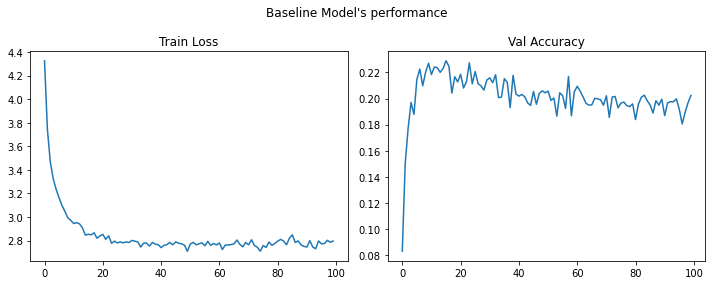

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].plot(range(len(res_loss)), res_loss)
axes[0].set_title("Train Loss")
axes[1].plot(range(len(res_acc)), res_acc)
axes[1].set_title("Val Accuracy")
plt.suptitle("Baseline Model's performance")
plt.tight_layout()
plt.show()

### Model Custom

- 학습이 될 수록 loss 감소시켜야 됨
  - scheduler 적용
- layer 깊이 추가
  - ResNet50 직접 구현해보기

In [71]:
train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))
])        

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))
])    

train = torchvision.datasets.CIFAR100(root="./", train=True, download=True, transform=train_transform)
test = torchvision.datasets.CIFAR100(root="./", train=False, download=True, transform=test_transform)

train_loader = torch.utils.data.DataLoader(train, batch_size=256,
                                           shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test, batch_size=256,
                                          shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [76]:
from torch.nn.modules import pooling
class BottleNeck(nn.Module):
    def __init__(self, in_channels, prj_channels, expansion, downsample=None, stride=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, prj_channels, kernel_size=1)
        self.conv2 = nn.Conv2d(prj_channels, prj_channels, kernel_size=3, stride=stride, padding=1)
        self.conv3 = nn.Conv2d(prj_channels, prj_channels*expansion, kernel_size=1)
        
        self.bn1 = nn.BatchNorm2d(prj_channels)
        self.bn2 = nn.BatchNorm2d(prj_channels)
        self.bn3 = nn.BatchNorm2d(prj_channels*expansion)

        self.downsample = downsample


    def forward(self, x):
        output = F.relu(self.bn1(self.conv1(x)))
        output = F.relu(self.bn2(self.conv2(output)))
        output = F.relu(self.bn3(self.conv3(output)))

        if self.downsample is not None:
            x = self.downsample(x)

        output = output + x
        output = F.relu(output)
        return output

In [77]:
class MyModel(nn.Module):
    def __init__(self, in_channels, expansion, n_blocks, num_classes):
        super(MyModel, self).__init__()
        """Base Model"""
        self.expansion = expansion
        self.n_blocks = n_blocks
        
        downsample = []

        modules = [BottleNeck(256, 64, self.expansion) for idx, _ in enumerate(range(n_blocks[0]))]
        self.block1 = nn.Sequential(*modules)

        out_channels = 64*self.expansion
        downsample = nn.Sequential(nn.Conv2d(out_channels, out_channels*2, kernel_size=1, stride=2), nn.BatchNorm2d(out_channels*2))
        modules = [BottleNeck(out_channels if idx==0 else out_channels*2, 128, self.expansion, downsample if idx==0 else None, 2 if idx==0 else 1) for idx,  _ in enumerate(range(n_blocks[1]))]
        self.block2 = nn.Sequential(*modules)

        out_channels = out_channels*2
        downsample = nn.Sequential(nn.Conv2d(out_channels, out_channels*2, kernel_size=1, stride=2), nn.BatchNorm2d(out_channels*2))
        modules = [BottleNeck(out_channels if idx==0 else out_channels*2, 256, self.expansion, downsample if idx==0 else None, 2 if idx==0 else 1) for idx, _ in enumerate(range(n_blocks[2]))]
        self.block3 = nn.Sequential(*modules)

        out_channels = out_channels*2
        downsample = nn.Sequential(nn.Conv2d(out_channels, out_channels*2, kernel_size=1, stride=2), nn.BatchNorm2d(out_channels*2))
        modules = [BottleNeck(out_channels if idx==0 else out_channels*2, 512, self.expansion, downsample if idx==0 else None, 2 if idx==0 else 1) for idx, _ in enumerate(range(n_blocks[3]))]
        self.block4 = nn.Sequential(*modules)

        self.conv1 = nn.Conv2d(3, 256, 7, 2, 3)
        self.bn1 = nn.BatchNorm2d(256)
        self.pool1 = nn.MaxPool2d(3, 2, 1)
        self.fc = nn.Linear(2048, 100)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.pool1(F.relu(x))

        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)

        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.fc(x)
        return x

In [78]:
model = MyModel(3, 4, [3,4,6,3], 100).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, "max")

In [79]:
res_acc = []
res_loss = []
for epoch in range(100):
    model.train()
    running_loss = 0.0
    best_acc = 0.0
    best_model_wts = model.state_dict()
    print(f"train epoch: {epoch+1}----------------")
    for img, label in tqdm(train_loader):
        img = img.to(device)
        label = label.to(device)
        optimizer.zero_grad()
        output = model(img)
        loss = criterion(output, label)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
    correct, all_data = 0,0
    print("\ntrain_loss : ", running_loss / len(train_loader))
    model.eval()
    for img, label in test_loader:
        with torch.no_grad():
            img = img.to(device)
            label = label.to(device)
            output = model(img)

            correct += torch.sum(torch.argmax(output, dim=1) == label).item()
            all_data += len(label)
    scheduler.step(correct / all_data)
    print("val_acc : ", correct / all_data)
    res_loss.append(running_loss / len(train_loader))
    res_acc.append(correct / all_data)
    if correct / all_data > best_acc:
      best_acc = correct / all_data
      best_model_wts = model.state_dict()

train epoch: 1----------------


100%|██████████| 196/196 [00:24<00:00,  8.01it/s]


train_loss :  4.205496122642439


val_acc :  0.1344
train epoch: 2----------------


100%|██████████| 196/196 [00:24<00:00,  7.97it/s]


train_loss :  3.4978825790541515


val_acc :  0.1975
train epoch: 3----------------


100%|██████████| 196/196 [00:23<00:00,  8.26it/s]


train_loss :  3.1332782373136405


val_acc :  0.2279
train epoch: 4----------------


100%|██████████| 196/196 [00:23<00:00,  8.18it/s]


train_loss :  2.8356766506117217


val_acc :  0.2496
train epoch: 5----------------


100%|██████████| 196/196 [00:23<00:00,  8.31it/s]


train_loss :  2.545423294816698


val_acc :  0.275
train epoch: 6----------------


100%|██████████| 196/196 [00:23<00:00,  8.24it/s]


train_loss :  2.255535976010926


val_acc :  0.2755
train epoch: 7----------------


100%|██████████| 196/196 [00:23<00:00,  8.21it/s]


train_loss :  1.95936327503652


val_acc :  0.283
train epoch: 8----------------


100%|██████████| 196/196 [00:23<00:00,  8.17it/s]


train_loss :  1.6675484758250567


val_acc :  0.2906
train epoch: 9----------------


100%|██████████| 196/196 [00:23<00:00,  8.21it/s]


train_loss :  1.3735161247302075


val_acc :  0.2961
train epoch: 10----------------


100%|██████████| 196/196 [00:23<00:00,  8.24it/s]


train_loss :  1.0832038679901435


val_acc :  0.2934
train epoch: 11----------------


100%|██████████| 196/196 [00:23<00:00,  8.28it/s]


train_loss :  0.8222964764857779


val_acc :  0.3007
train epoch: 12----------------


100%|██████████| 196/196 [00:23<00:00,  8.22it/s]


train_loss :  0.5476002129060882


val_acc :  0.3066
train epoch: 13----------------


100%|██████████| 196/196 [00:23<00:00,  8.21it/s]


train_loss :  0.34838469045198694


val_acc :  0.3106
train epoch: 14----------------


100%|██████████| 196/196 [00:23<00:00,  8.37it/s]


train_loss :  0.19024116093558924


val_acc :  0.3126
train epoch: 15----------------


100%|██████████| 196/196 [00:23<00:00,  8.27it/s]


train_loss :  0.10714264578965245


val_acc :  0.3199
train epoch: 16----------------


100%|██████████| 196/196 [00:23<00:00,  8.26it/s]


train_loss :  0.05481786055642427


val_acc :  0.3253
train epoch: 17----------------


100%|██████████| 196/196 [00:23<00:00,  8.25it/s]


train_loss :  0.030728831982278094


val_acc :  0.3262
train epoch: 18----------------


100%|██████████| 196/196 [00:23<00:00,  8.26it/s]


train_loss :  0.022830349787575553


val_acc :  0.3303
train epoch: 19----------------


100%|██████████| 196/196 [00:23<00:00,  8.25it/s]


train_loss :  0.018066249105946293


val_acc :  0.3326
train epoch: 20----------------


100%|██████████| 196/196 [00:23<00:00,  8.25it/s]


train_loss :  0.015349447451607913


val_acc :  0.334
train epoch: 21----------------


100%|██████████| 196/196 [00:23<00:00,  8.20it/s]


train_loss :  0.014190489262323447


val_acc :  0.3307
train epoch: 22----------------


100%|██████████| 196/196 [00:23<00:00,  8.25it/s]


train_loss :  0.010565023054368794


val_acc :  0.3303
train epoch: 23----------------


100%|██████████| 196/196 [00:23<00:00,  8.42it/s]


train_loss :  0.009792159343546979


val_acc :  0.331
train epoch: 24----------------


100%|██████████| 196/196 [00:23<00:00,  8.28it/s]


train_loss :  0.007645877959605839


val_acc :  0.3338
train epoch: 25----------------


100%|██████████| 196/196 [00:23<00:00,  8.22it/s]


train_loss :  0.007209681311850341


val_acc :  0.3356
train epoch: 26----------------


100%|██████████| 196/196 [00:23<00:00,  8.25it/s]


train_loss :  0.007399778732345725


val_acc :  0.3356
train epoch: 27----------------


100%|██████████| 196/196 [00:23<00:00,  8.23it/s]


train_loss :  0.0074953182994825195


val_acc :  0.3343
train epoch: 28----------------


100%|██████████| 196/196 [00:23<00:00,  8.23it/s]


train_loss :  0.006239205491919146


val_acc :  0.3336
train epoch: 29----------------


100%|██████████| 196/196 [00:23<00:00,  8.22it/s]


train_loss :  0.0063165211955047386


val_acc :  0.3336
train epoch: 30----------------


100%|██████████| 196/196 [00:23<00:00,  8.22it/s]


train_loss :  0.006350763239517656


val_acc :  0.3342
train epoch: 31----------------


100%|██████████| 196/196 [00:23<00:00,  8.18it/s]


train_loss :  0.005373556801231996


val_acc :  0.333
train epoch: 32----------------


100%|██████████| 196/196 [00:23<00:00,  8.39it/s]


train_loss :  0.004568029807438618


val_acc :  0.3372
train epoch: 33----------------


100%|██████████| 196/196 [00:23<00:00,  8.23it/s]


train_loss :  0.004845368876644619


val_acc :  0.3338
train epoch: 34----------------


100%|██████████| 196/196 [00:23<00:00,  8.25it/s]


train_loss :  0.004567739247862364


val_acc :  0.3328
train epoch: 35----------------


100%|██████████| 196/196 [00:23<00:00,  8.21it/s]


train_loss :  0.003976014385128165


val_acc :  0.3308
train epoch: 36----------------


100%|██████████| 196/196 [00:23<00:00,  8.23it/s]


train_loss :  0.0041360203242071965


val_acc :  0.3325
train epoch: 37----------------


100%|██████████| 196/196 [00:23<00:00,  8.23it/s]


train_loss :  0.004155357977095041


val_acc :  0.3303
train epoch: 38----------------


100%|██████████| 196/196 [00:23<00:00,  8.20it/s]


train_loss :  0.0040641015072410205


val_acc :  0.3299
train epoch: 39----------------


100%|██████████| 196/196 [00:23<00:00,  8.27it/s]


train_loss :  0.00448415442654977


val_acc :  0.3349
train epoch: 40----------------


100%|██████████| 196/196 [00:23<00:00,  8.27it/s]


train_loss :  0.004216699115575614


val_acc :  0.331
train epoch: 41----------------


100%|██████████| 196/196 [00:23<00:00,  8.38it/s]


train_loss :  0.0038089401145674742


val_acc :  0.3311
train epoch: 42----------------


100%|██████████| 196/196 [00:23<00:00,  8.17it/s]


train_loss :  0.003720983012332296


val_acc :  0.3333
train epoch: 43----------------


100%|██████████| 196/196 [00:23<00:00,  8.25it/s]


train_loss :  0.00454435667690669


val_acc :  0.3288
train epoch: 44----------------


100%|██████████| 196/196 [00:23<00:00,  8.23it/s]


train_loss :  0.003196921316569443


val_acc :  0.3307
train epoch: 45----------------


100%|██████████| 196/196 [00:23<00:00,  8.23it/s]


train_loss :  0.0037453710333187587


val_acc :  0.3314
train epoch: 46----------------


100%|██████████| 196/196 [00:23<00:00,  8.25it/s]


train_loss :  0.0029528665627181834


val_acc :  0.3325
train epoch: 47----------------


100%|██████████| 196/196 [00:23<00:00,  8.22it/s]


train_loss :  0.002856363009005709


val_acc :  0.3313
train epoch: 48----------------


100%|██████████| 196/196 [00:23<00:00,  8.22it/s]


train_loss :  0.002861015740972088


val_acc :  0.3338
train epoch: 49----------------


100%|██████████| 196/196 [00:23<00:00,  8.22it/s]


train_loss :  0.002873136503954551


val_acc :  0.3319
train epoch: 50----------------


100%|██████████| 196/196 [00:23<00:00,  8.32it/s]


train_loss :  0.0025976627319100865


val_acc :  0.3311
train epoch: 51----------------


100%|██████████| 196/196 [00:23<00:00,  8.37it/s]


train_loss :  0.0025723401138711037


val_acc :  0.3309
train epoch: 52----------------


100%|██████████| 196/196 [00:23<00:00,  8.27it/s]


train_loss :  0.0026181905027906583


val_acc :  0.3329
train epoch: 53----------------


100%|██████████| 196/196 [00:23<00:00,  8.27it/s]


train_loss :  0.0028091211071504013


val_acc :  0.3309
train epoch: 54----------------


100%|██████████| 196/196 [00:23<00:00,  8.27it/s]


train_loss :  0.0029128218593541533


val_acc :  0.3315
train epoch: 55----------------


100%|██████████| 196/196 [00:23<00:00,  8.26it/s]


train_loss :  0.0026236493764112572


val_acc :  0.3316
train epoch: 56----------------


100%|██████████| 196/196 [00:23<00:00,  8.26it/s]


train_loss :  0.0025933844967488654


val_acc :  0.3307
train epoch: 57----------------


100%|██████████| 196/196 [00:23<00:00,  8.20it/s]


train_loss :  0.003106450994038118


val_acc :  0.3327
train epoch: 58----------------


100%|██████████| 196/196 [00:23<00:00,  8.26it/s]


train_loss :  0.0025235910244210034


val_acc :  0.3338
train epoch: 59----------------


100%|██████████| 196/196 [00:23<00:00,  8.26it/s]


train_loss :  0.002388596920800224


val_acc :  0.3329
train epoch: 60----------------


100%|██████████| 196/196 [00:23<00:00,  8.26it/s]


train_loss :  0.0024622534870939825


val_acc :  0.3326
train epoch: 61----------------


100%|██████████| 196/196 [00:23<00:00,  8.39it/s]


train_loss :  0.00226874192950924


val_acc :  0.3329
train epoch: 62----------------


100%|██████████| 196/196 [00:23<00:00,  8.30it/s]


train_loss :  0.0024683341783072266


val_acc :  0.3321
train epoch: 63----------------


100%|██████████| 196/196 [00:23<00:00,  8.27it/s]


train_loss :  0.0023845603478103118


val_acc :  0.3289
train epoch: 64----------------


100%|██████████| 196/196 [00:23<00:00,  8.28it/s]


train_loss :  0.0024402046734134535


val_acc :  0.3326
train epoch: 65----------------


100%|██████████| 196/196 [00:23<00:00,  8.30it/s]


train_loss :  0.0022310742087381873


val_acc :  0.3337
train epoch: 66----------------


100%|██████████| 196/196 [00:23<00:00,  8.24it/s]


train_loss :  0.0024384433808688987


val_acc :  0.332
train epoch: 67----------------


100%|██████████| 196/196 [00:26<00:00,  7.42it/s]


train_loss :  0.0027143700221762515


val_acc :  0.3321
train epoch: 68----------------


100%|██████████| 196/196 [00:25<00:00,  7.76it/s]


train_loss :  0.0023336871865690134


val_acc :  0.3329
train epoch: 69----------------


100%|██████████| 196/196 [00:23<00:00,  8.18it/s]


train_loss :  0.002639623175907348


val_acc :  0.33
train epoch: 70----------------


100%|██████████| 196/196 [00:23<00:00,  8.24it/s]


train_loss :  0.002353719160333751


val_acc :  0.33
train epoch: 71----------------


100%|██████████| 196/196 [00:24<00:00,  8.12it/s]


train_loss :  0.002734660579613885


val_acc :  0.3332
train epoch: 72----------------


100%|██████████| 196/196 [00:24<00:00,  8.04it/s]


train_loss :  0.0026245085021827787


val_acc :  0.3312
train epoch: 73----------------


100%|██████████| 196/196 [00:23<00:00,  8.25it/s]


train_loss :  0.002490189323220782


val_acc :  0.3338
train epoch: 74----------------


100%|██████████| 196/196 [00:23<00:00,  8.21it/s]


train_loss :  0.002371277761400905


val_acc :  0.331
train epoch: 75----------------


100%|██████████| 196/196 [00:24<00:00,  8.16it/s]


train_loss :  0.002362946382182061


val_acc :  0.3342
train epoch: 76----------------


100%|██████████| 196/196 [00:23<00:00,  8.25it/s]


train_loss :  0.0024024686123938206


val_acc :  0.3329
train epoch: 77----------------


100%|██████████| 196/196 [00:23<00:00,  8.41it/s]


train_loss :  0.0022209693543489414


val_acc :  0.3312
train epoch: 78----------------


100%|██████████| 196/196 [00:23<00:00,  8.21it/s]


train_loss :  0.003407323588640904


val_acc :  0.3314
train epoch: 79----------------


100%|██████████| 196/196 [00:23<00:00,  8.25it/s]


train_loss :  0.002895905727423176


val_acc :  0.332
train epoch: 80----------------


100%|██████████| 196/196 [00:23<00:00,  8.24it/s]


train_loss :  0.002360339423793615


val_acc :  0.3312
train epoch: 81----------------


100%|██████████| 196/196 [00:24<00:00,  8.16it/s]


train_loss :  0.0023298513281458455


val_acc :  0.3334
train epoch: 82----------------


100%|██████████| 196/196 [00:23<00:00,  8.26it/s]


train_loss :  0.0024152081828013212


val_acc :  0.3313
train epoch: 83----------------


100%|██████████| 196/196 [00:23<00:00,  8.25it/s]


train_loss :  0.0027338512490113855


val_acc :  0.3296
train epoch: 84----------------


100%|██████████| 196/196 [00:23<00:00,  8.17it/s]


train_loss :  0.0025156123132435413


val_acc :  0.3305
train epoch: 85----------------


100%|██████████| 196/196 [00:23<00:00,  8.20it/s]


train_loss :  0.00239762391690735


val_acc :  0.3322
train epoch: 86----------------


100%|██████████| 196/196 [00:23<00:00,  8.27it/s]


train_loss :  0.0025350793207786523


val_acc :  0.3324
train epoch: 87----------------


100%|██████████| 196/196 [00:23<00:00,  8.29it/s]


train_loss :  0.0037044844784944945


val_acc :  0.3318
train epoch: 88----------------


100%|██████████| 196/196 [00:23<00:00,  8.21it/s]


train_loss :  0.0024339657378435247


val_acc :  0.3324
train epoch: 89----------------


100%|██████████| 196/196 [00:23<00:00,  8.22it/s]


train_loss :  0.0023531065576671796


val_acc :  0.3323
train epoch: 90----------------


100%|██████████| 196/196 [00:23<00:00,  8.19it/s]


train_loss :  0.0024105802274009746


val_acc :  0.3325
train epoch: 91----------------


100%|██████████| 196/196 [00:23<00:00,  8.22it/s]


train_loss :  0.002908238733652979


val_acc :  0.3323
train epoch: 92----------------


100%|██████████| 196/196 [00:23<00:00,  8.27it/s]


train_loss :  0.002468894178176071


val_acc :  0.3323
train epoch: 93----------------


100%|██████████| 196/196 [00:23<00:00,  8.21it/s]


train_loss :  0.00260243981028907


val_acc :  0.3332
train epoch: 94----------------


100%|██████████| 196/196 [00:23<00:00,  8.21it/s]


train_loss :  0.0027068516771708217


val_acc :  0.3307
train epoch: 95----------------


100%|██████████| 196/196 [00:23<00:00,  8.29it/s]


train_loss :  0.0023741132864248653


val_acc :  0.3328
train epoch: 96----------------


100%|██████████| 196/196 [00:23<00:00,  8.42it/s]


train_loss :  0.002433688710063544


val_acc :  0.3343
train epoch: 97----------------


100%|██████████| 196/196 [00:23<00:00,  8.27it/s]


train_loss :  0.002276131696167535


val_acc :  0.3322
train epoch: 98----------------


100%|██████████| 196/196 [00:23<00:00,  8.23it/s]


train_loss :  0.002292843286972018


val_acc :  0.3332
train epoch: 99----------------


100%|██████████| 196/196 [00:23<00:00,  8.17it/s]


train_loss :  0.002464410290300219


val_acc :  0.3313
train epoch: 100----------------


100%|██████████| 196/196 [00:23<00:00,  8.24it/s]


train_loss :  0.0025065224985972197


val_acc :  0.3328


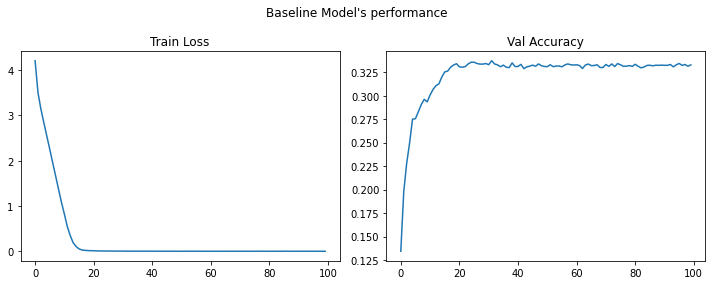

In [81]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].plot(range(len(res_loss)), res_loss)
axes[0].set_title("Train Loss")
axes[1].plot(range(len(res_acc)), res_acc)
axes[1].set_title("Val Accuracy")
plt.suptitle("Baseline Model's performance")
plt.tight_layout()
plt.show()

In [85]:
print("Best Validation Accuracy: ", best_acc)

Best Validation Accuracy:  0.3328


In [83]:
model = MyModel(3, 4, [3,4,6,3], 100).to(device)
optimizer = optim.AdamW(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, "max")

In [86]:
res_acc = []
res_loss = []
for epoch in range(100):
    model.train()
    running_loss = 0.0
    best_acc = 0.0
    best_model_wts = model.state_dict()
    print(f"train epoch: {epoch+1}----------------")
    for img, label in tqdm(train_loader):
        img = img.to(device)
        label = label.to(device)
        optimizer.zero_grad()
        output = model(img)
        loss = criterion(output, label)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
    correct, all_data = 0,0
    print("\ntrain_loss : ", running_loss / len(train_loader))
    model.eval()
    for img, label in test_loader:
        with torch.no_grad():
            img = img.to(device)
            label = label.to(device)
            output = model(img)

            correct += torch.sum(torch.argmax(output, dim=1) == label).item()
            all_data += len(label)
    scheduler.step(correct / all_data)
    print("val_acc : ", correct / all_data)
    res_loss.append(running_loss / len(train_loader))
    res_acc.append(correct / all_data)
    if correct / all_data > best_acc:
      best_acc = correct / all_data
      best_model_wts = model.state_dict()

train epoch: 1----------------


100%|██████████| 196/196 [00:25<00:00,  7.57it/s]


train_loss :  4.479009872796584


val_acc :  0.0806
train epoch: 2----------------


100%|██████████| 196/196 [00:25<00:00,  7.64it/s]


train_loss :  3.7602953874334997


val_acc :  0.1742
train epoch: 3----------------


100%|██████████| 196/196 [00:26<00:00,  7.42it/s]


train_loss :  3.638044211329246


val_acc :  0.0805
train epoch: 4----------------


100%|██████████| 196/196 [00:26<00:00,  7.43it/s]


train_loss :  3.5479379977498735


val_acc :  0.1305
train epoch: 5----------------


100%|██████████| 196/196 [00:26<00:00,  7.36it/s]


train_loss :  3.2151164388170046


val_acc :  0.269
train epoch: 6----------------


100%|██████████| 196/196 [00:26<00:00,  7.45it/s]


train_loss :  2.919959069514761


val_acc :  0.2951
train epoch: 7----------------


100%|██████████| 196/196 [00:26<00:00,  7.52it/s]


train_loss :  2.6319728031450387


val_acc :  0.3167
train epoch: 8----------------


100%|██████████| 196/196 [00:25<00:00,  7.56it/s]


train_loss :  2.5693660682561448


val_acc :  0.2177
train epoch: 9----------------


100%|██████████| 196/196 [00:26<00:00,  7.50it/s]


train_loss :  2.3986569253765806


val_acc :  0.2921
train epoch: 10----------------


100%|██████████| 196/196 [00:26<00:00,  7.52it/s]


train_loss :  2.394891366666677


val_acc :  0.3598
train epoch: 11----------------


100%|██████████| 196/196 [00:26<00:00,  7.51it/s]


train_loss :  2.091549595399779


val_acc :  0.3735
train epoch: 12----------------


100%|██████████| 196/196 [00:26<00:00,  7.53it/s]


train_loss :  1.8362575580879135


val_acc :  0.3343
train epoch: 13----------------


100%|██████████| 196/196 [00:26<00:00,  7.54it/s]


train_loss :  1.728250268770724


val_acc :  0.3922
train epoch: 14----------------


100%|██████████| 196/196 [00:26<00:00,  7.49it/s]


train_loss :  1.5489859246477788


val_acc :  0.374
train epoch: 15----------------


100%|██████████| 196/196 [00:26<00:00,  7.52it/s]


train_loss :  1.3765183644635337


val_acc :  0.3901
train epoch: 16----------------


100%|██████████| 196/196 [00:26<00:00,  7.50it/s]


train_loss :  1.1041566455850795


val_acc :  0.3978
train epoch: 17----------------


100%|██████████| 196/196 [00:26<00:00,  7.49it/s]


train_loss :  0.8823394775390625


val_acc :  0.4006
train epoch: 18----------------


100%|██████████| 196/196 [00:25<00:00,  7.55it/s]


train_loss :  0.7315221241846377


val_acc :  0.3901
train epoch: 19----------------


100%|██████████| 196/196 [00:26<00:00,  7.50it/s]


train_loss :  1.0238530860871684


val_acc :  0.3364
train epoch: 20----------------


100%|██████████| 196/196 [00:25<00:00,  7.56it/s]


train_loss :  0.9014314677642317


val_acc :  0.4017
train epoch: 21----------------


100%|██████████| 196/196 [00:26<00:00,  7.52it/s]


train_loss :  0.4374321282518153


val_acc :  0.4167
train epoch: 22----------------


100%|██████████| 196/196 [00:26<00:00,  7.53it/s]


train_loss :  0.23695490684132187


val_acc :  0.4238
train epoch: 23----------------


100%|██████████| 196/196 [00:26<00:00,  7.52it/s]


train_loss :  0.16971800826033767


val_acc :  0.415
train epoch: 24----------------


100%|██████████| 196/196 [00:25<00:00,  7.57it/s]


train_loss :  0.14625434512842675


val_acc :  0.4251
train epoch: 25----------------


100%|██████████| 196/196 [00:25<00:00,  7.54it/s]


train_loss :  0.14054949243305898


val_acc :  0.4192
train epoch: 26----------------


100%|██████████| 196/196 [00:26<00:00,  7.46it/s]


train_loss :  0.17326478823563274


val_acc :  0.4159
train epoch: 27----------------


100%|██████████| 196/196 [00:26<00:00,  7.50it/s]


train_loss :  0.16551560064663692


val_acc :  0.409
train epoch: 28----------------


100%|██████████| 196/196 [00:26<00:00,  7.51it/s]


train_loss :  0.1606663366285514


val_acc :  0.4135
train epoch: 29----------------


100%|██████████| 196/196 [00:26<00:00,  7.49it/s]


train_loss :  0.19802534078456918


val_acc :  0.4155
train epoch: 30----------------


100%|██████████| 196/196 [00:26<00:00,  7.51it/s]


train_loss :  0.15410140057911678


val_acc :  0.4206
train epoch: 31----------------


100%|██████████| 196/196 [00:25<00:00,  7.55it/s]


train_loss :  0.09102004418643761


val_acc :  0.4225
train epoch: 32----------------


100%|██████████| 196/196 [00:26<00:00,  7.45it/s]


train_loss :  0.06766078865383657


val_acc :  0.4244
train epoch: 33----------------


100%|██████████| 196/196 [00:25<00:00,  7.56it/s]


train_loss :  0.0644999219541799


val_acc :  0.4203
train epoch: 34----------------


100%|██████████| 196/196 [00:26<00:00,  7.53it/s]


train_loss :  0.12118305896922034


val_acc :  0.3944
train epoch: 35----------------


100%|██████████| 196/196 [00:25<00:00,  7.56it/s]


train_loss :  0.2612077719246855


val_acc :  0.4023
train epoch: 36----------------


100%|██████████| 196/196 [00:26<00:00,  7.44it/s]


train_loss :  0.06196528061160019


val_acc :  0.4477
train epoch: 37----------------


100%|██████████| 196/196 [00:26<00:00,  7.54it/s]


train_loss :  0.015323172644141833


val_acc :  0.4516
train epoch: 38----------------


100%|██████████| 196/196 [00:26<00:00,  7.52it/s]


train_loss :  0.009466106437944941


val_acc :  0.4525
train epoch: 39----------------


100%|██████████| 196/196 [00:26<00:00,  7.51it/s]


train_loss :  0.0073906158926250526


val_acc :  0.4539
train epoch: 40----------------


100%|██████████| 196/196 [00:26<00:00,  7.51it/s]


train_loss :  0.0060717892745148615


val_acc :  0.4567
train epoch: 41----------------


100%|██████████| 196/196 [00:26<00:00,  7.52it/s]


train_loss :  0.005013269257057002


val_acc :  0.4548
train epoch: 42----------------


100%|██████████| 196/196 [00:26<00:00,  7.42it/s]


train_loss :  0.004641659656416016


val_acc :  0.455
train epoch: 43----------------


100%|██████████| 196/196 [00:26<00:00,  7.46it/s]


train_loss :  0.004376400407636538


val_acc :  0.4559
train epoch: 44----------------


100%|██████████| 196/196 [00:25<00:00,  7.54it/s]


train_loss :  0.003845705084707018


val_acc :  0.4566
train epoch: 45----------------


100%|██████████| 196/196 [00:26<00:00,  7.43it/s]


train_loss :  0.0036727773543561294


val_acc :  0.4585
train epoch: 46----------------


100%|██████████| 196/196 [00:25<00:00,  7.55it/s]


train_loss :  0.0031908846588577238


val_acc :  0.458
train epoch: 47----------------


100%|██████████| 196/196 [00:25<00:00,  7.56it/s]


train_loss :  0.003209860567763752


val_acc :  0.4566
train epoch: 48----------------


100%|██████████| 196/196 [00:26<00:00,  7.54it/s]


train_loss :  0.0032653112537037506


val_acc :  0.4587
train epoch: 49----------------


100%|██████████| 196/196 [00:25<00:00,  7.62it/s]


train_loss :  0.0030640373772665933


val_acc :  0.4594
train epoch: 50----------------


100%|██████████| 196/196 [00:26<00:00,  7.53it/s]


train_loss :  0.003119106276188882


val_acc :  0.4613
train epoch: 51----------------


100%|██████████| 196/196 [00:25<00:00,  7.55it/s]


train_loss :  0.0026926851700112336


val_acc :  0.4608
train epoch: 52----------------


100%|██████████| 196/196 [00:25<00:00,  7.58it/s]


train_loss :  0.00310864311385168


val_acc :  0.4633
train epoch: 53----------------


100%|██████████| 196/196 [00:25<00:00,  7.56it/s]


train_loss :  0.0028893877164109095


val_acc :  0.4613
train epoch: 54----------------


100%|██████████| 196/196 [00:25<00:00,  7.58it/s]


train_loss :  0.00245315006254621


val_acc :  0.463
train epoch: 55----------------


100%|██████████| 196/196 [00:25<00:00,  7.59it/s]


train_loss :  0.0024391578166503267


val_acc :  0.4622
train epoch: 56----------------


100%|██████████| 196/196 [00:25<00:00,  7.55it/s]


train_loss :  0.002920028650527345


val_acc :  0.462
train epoch: 57----------------


100%|██████████| 196/196 [00:25<00:00,  7.55it/s]


train_loss :  0.002834620380391633


val_acc :  0.4629
train epoch: 58----------------


100%|██████████| 196/196 [00:25<00:00,  7.57it/s]


train_loss :  0.002699534724138639


val_acc :  0.4619
train epoch: 59----------------


100%|██████████| 196/196 [00:26<00:00,  7.51it/s]


train_loss :  0.002939098571042283


val_acc :  0.4627
train epoch: 60----------------


100%|██████████| 196/196 [00:25<00:00,  7.58it/s]


train_loss :  0.002847145048560508


val_acc :  0.4627
train epoch: 61----------------


100%|██████████| 196/196 [00:25<00:00,  7.57it/s]


train_loss :  0.0025304073733051916


val_acc :  0.4645
train epoch: 62----------------


100%|██████████| 196/196 [00:26<00:00,  7.53it/s]


train_loss :  0.0021595191421362628


val_acc :  0.4642
train epoch: 63----------------


100%|██████████| 196/196 [00:26<00:00,  7.54it/s]


train_loss :  0.002304354483589568


val_acc :  0.4626
train epoch: 64----------------


100%|██████████| 196/196 [00:26<00:00,  7.50it/s]


train_loss :  0.0024703952818823866


val_acc :  0.4629
train epoch: 65----------------


100%|██████████| 196/196 [00:25<00:00,  7.55it/s]


train_loss :  0.0027685011137153345


val_acc :  0.4613
train epoch: 66----------------


100%|██████████| 196/196 [00:25<00:00,  7.54it/s]


train_loss :  0.002039189340709471


val_acc :  0.4631
train epoch: 67----------------


100%|██████████| 196/196 [00:25<00:00,  7.55it/s]


train_loss :  0.0019567592806902677


val_acc :  0.4603
train epoch: 68----------------


100%|██████████| 196/196 [00:25<00:00,  7.60it/s]


train_loss :  0.002436981938407538


val_acc :  0.4634
train epoch: 69----------------


100%|██████████| 196/196 [00:26<00:00,  7.52it/s]


train_loss :  0.0020422353735906357


val_acc :  0.4652
train epoch: 70----------------


100%|██████████| 196/196 [00:25<00:00,  7.55it/s]


train_loss :  0.0021616110449884924


val_acc :  0.4664
train epoch: 71----------------


100%|██████████| 196/196 [00:25<00:00,  7.57it/s]


train_loss :  0.0021085317972132805


val_acc :  0.465
train epoch: 72----------------


100%|██████████| 196/196 [00:25<00:00,  7.57it/s]


train_loss :  0.0018698387058084707


val_acc :  0.4658
train epoch: 73----------------


100%|██████████| 196/196 [00:25<00:00,  7.57it/s]


train_loss :  0.001789955467571343


val_acc :  0.4644
train epoch: 74----------------


100%|██████████| 196/196 [00:25<00:00,  7.56it/s]


train_loss :  0.0018917561411603391


val_acc :  0.467
train epoch: 75----------------


100%|██████████| 196/196 [00:26<00:00,  7.53it/s]


train_loss :  0.00675622594266018


val_acc :  0.4515
train epoch: 76----------------


100%|██████████| 196/196 [00:26<00:00,  7.52it/s]


train_loss :  0.0036663841898671866


val_acc :  0.4598
train epoch: 77----------------


100%|██████████| 196/196 [00:25<00:00,  7.57it/s]


train_loss :  0.0020194556596760203


val_acc :  0.4584
train epoch: 78----------------


100%|██████████| 196/196 [00:25<00:00,  7.56it/s]


train_loss :  0.0013697553795467758


val_acc :  0.4593
train epoch: 79----------------


100%|██████████| 196/196 [00:26<00:00,  7.54it/s]


train_loss :  0.001138456351030499


val_acc :  0.4612
train epoch: 80----------------


100%|██████████| 196/196 [00:25<00:00,  7.57it/s]


train_loss :  0.0010809256841917997


val_acc :  0.4612
train epoch: 81----------------


100%|██████████| 196/196 [00:25<00:00,  7.54it/s]


train_loss :  0.0012322490819853408


val_acc :  0.4646
train epoch: 82----------------


100%|██████████| 196/196 [00:25<00:00,  7.57it/s]


train_loss :  0.0012091716554856915


val_acc :  0.4635
train epoch: 83----------------


100%|██████████| 196/196 [00:26<00:00,  7.50it/s]


train_loss :  0.0011947216183272053


val_acc :  0.464
train epoch: 84----------------


100%|██████████| 196/196 [00:26<00:00,  7.54it/s]


train_loss :  0.0012067249241152574


val_acc :  0.4657
train epoch: 85----------------


100%|██████████| 196/196 [00:26<00:00,  7.53it/s]


train_loss :  0.001218121354157825


val_acc :  0.4667
train epoch: 86----------------


100%|██████████| 196/196 [00:26<00:00,  7.50it/s]


train_loss :  0.0008137418576088563


val_acc :  0.4671
train epoch: 87----------------


100%|██████████| 196/196 [00:26<00:00,  7.52it/s]


train_loss :  0.000705957397314


val_acc :  0.4677
train epoch: 88----------------


100%|██████████| 196/196 [00:26<00:00,  7.52it/s]


train_loss :  0.0006417149438211524


val_acc :  0.467
train epoch: 89----------------


100%|██████████| 196/196 [00:25<00:00,  7.54it/s]


train_loss :  0.0005828441022384474


val_acc :  0.4668
train epoch: 90----------------


100%|██████████| 196/196 [00:25<00:00,  7.54it/s]


train_loss :  0.0005893876549802075


val_acc :  0.4684
train epoch: 91----------------


100%|██████████| 196/196 [00:25<00:00,  7.56it/s]


train_loss :  0.0005614303230760591


val_acc :  0.4673
train epoch: 92----------------


100%|██████████| 196/196 [00:25<00:00,  7.54it/s]


train_loss :  0.0005282727200451796


val_acc :  0.4684
train epoch: 93----------------


100%|██████████| 196/196 [00:26<00:00,  7.48it/s]


train_loss :  0.0005328771168970722


val_acc :  0.4684
train epoch: 94----------------


100%|██████████| 196/196 [00:26<00:00,  7.51it/s]


train_loss :  0.000539466382550166


val_acc :  0.4671
train epoch: 95----------------


100%|██████████| 196/196 [00:26<00:00,  7.47it/s]


train_loss :  0.0005350145072915605


val_acc :  0.4665
train epoch: 96----------------


100%|██████████| 196/196 [00:26<00:00,  7.48it/s]


train_loss :  0.0005215493108283097


val_acc :  0.4682
train epoch: 97----------------


100%|██████████| 196/196 [00:25<00:00,  7.56it/s]


train_loss :  0.0005260981760496792


val_acc :  0.4683
train epoch: 98----------------


100%|██████████| 196/196 [00:26<00:00,  7.52it/s]


train_loss :  0.0005031158975076064


val_acc :  0.4682
train epoch: 99----------------


100%|██████████| 196/196 [00:25<00:00,  7.55it/s]


train_loss :  0.0004953419355638753


val_acc :  0.469
train epoch: 100----------------


100%|██████████| 196/196 [00:26<00:00,  7.50it/s]


train_loss :  0.0005016672570565454


val_acc :  0.4671


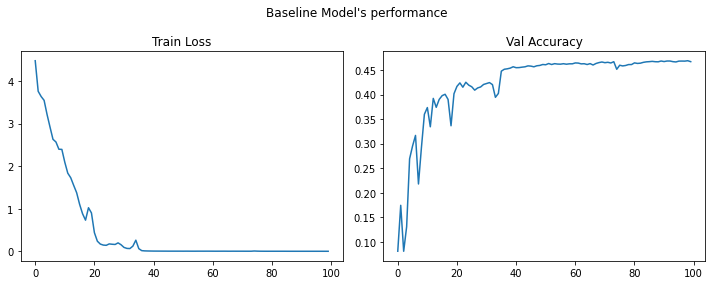

In [87]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].plot(range(len(res_loss)), res_loss)
axes[0].set_title("Train Loss")
axes[1].plot(range(len(res_acc)), res_acc)
axes[1].set_title("Val Accuracy")
plt.suptitle("Baseline Model's performance")
plt.tight_layout()
plt.show()

In [88]:
print("Best Validation Accuracy: ", best_acc)

Best Validation Accuracy:  0.4671
